# 2. Εγκατάσταση του llama.cpp

In [1]:
!pip install llama-cpp-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.1 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.3.7-cp311-cp311-linux_x86_64.whl size=4552824 sha256=233ca460479e90b874ba148e823471cd6ac64ebf59561809b8de156def8277d9
  Stored in directory: /root/.cache/pip/wheels/eb/82/79/ac77fcd49324b75ae6aa18e63a87cf9da4371a57e2cdc8dc03
Successfully built llama-cpp-python


In [10]:
from llama_cpp import Llama
from IPython.core.display import HTML

# 3. Χρήση μοντέλων ως chatbots

Κατεβάζουμε το μοντέλο
MaziyarPanahi/Llama-3.2-3B-Instruct-GGUF

In [6]:

llama = Llama.from_pretrained(
	repo_id="MaziyarPanahi/Llama-3.2-3B-Instruct-GGUF",
	filename="Llama-3.2-3B-Instruct.Q4_K_M.gguf",
)


llama_model_loader: loaded meta data with 35 key-value pairs and 255 tensors from /root/.cache/huggingface/hub/models--MaziyarPanahi--Llama-3.2-3B-Instruct-GGUF/snapshots/e56a0ae870579697698c3ded68df97747125d554/./Llama-3.2-3B-Instruct.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Models Meta Llama Llama 3.2 3B Instruct
llama_model_loader: - kv   3:                           general.finetune str              = Instruct
llama_model_loader: - kv   4:                           general.basename str              = models-meta-llama-Llama-3.2
llama_model_loader: - kv   5:                         general.size_label str  

In [ ]:
messages = [
{"role": "system", "content": "You are a helpful assistant."},
{"role": "user", "content": "What is the capital of Greece?"},
{"role": "assistant", "content": "The capital of Greece is Athens."},
{"role": "user", "content": "Who wrote '20,000 leagues under the sea'?"},
]

response = llama.create_chat_completion(messages)

In [ ]:
print("------------")
print(response['choices'][0]['message']['content'])
print("------------")

------------
"20,000 Leagues Under the Sea" was written by French author Jules Verne.
------------


## Prompt examples

### Επιστημονική έννοια

In [ ]:
physics_messages =[
    {"role": "system", "content": "You are a highly knowledgeable professor with a Phd in physics."},
    {"role": "user", "content": "Explain to me Newton's first law"},
    {"role": "assistant", "content": "Newton's first law: An object at rest remains at rest, or if in motion, remains in motion at a constant velocity unless acted on by a net external force."},
    {"role": "user", "content": " Explain to me Ohm's law and where do we apply it today"},
]

response_physics = llama.create_chat_completion(physics_messages)

Llama.generate: 114 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =   11798.52 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   397 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   82499.15 ms /   398 tokens


In [ ]:
print("------------")
print(response_physics['choices'][0]['message']['content'])
print("------------")

------------
A fundamental concept in physics and electrical engineering. Ohm's Law is a simple yet powerful principle that describes the relationship between voltage, current, and resistance in an electric circuit.

Ohm's Law states that the current flowing through a conductor is directly proportional to the voltage applied across it, and inversely proportional to the resistance of the conductor. Mathematically, it can be expressed as:

I = V/R

Where:

* I is the current in amperes (A)
* V is the voltage in volts (V)
* R is the resistance in ohms (Ω)

In other words, if you increase the voltage, the current will increase, but if you increase the resistance, the current will decrease. This law holds true for a wide range of materials and conditions.

Ohm's Law is widely applied in various fields, including:

1. **Electrical Engineering**: Designing and analyzing electrical circuits, such as power supplies, motors, and electronic devices.
2. **Telecommunications**: Understanding the be

Το μοντέλο δίνει σωστή  και αναλυτική απάντηση χωρίς συντακτικά λάθη.

### συγγραφή κώδικα 1

In [ ]:
code_messages1 =[
    {"role": "system", "content": "You are a senior software engineer specialized on python and game development  "},
    {"role": "user", "content": " recreate a tetris game using python "},
]

response_code1 = llama.create_chat_completion(code_messages1)

Llama.generate: 28 prefix-match hit, remaining 27 prompt tokens to eval
llama_perf_context_print:        load time =   11798.52 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    27 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   456 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   96840.24 ms /   483 tokens


In [ ]:
print("------------")
print(response_code1['choices'][0]['message']['content'])
print("------------")

------------
Here's a simple implementation of a Tetris game using Python and the Pygame library.

**Tetris Game Implementation**

```python
import pygame
import random

# Window size
WIDTH, HEIGHT = 400, 500

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)

class Shape:
    def __init__(self):
        self.x = 5
        self.y = 0
        self.color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        self.blocks = []

    def draw(self, screen):
        for block in self.blocks:
            pygame.draw.rect(screen, self.color, (block[0] + self.x, block[1] + self.y, 30, 30))

    def rotate(self):
        self.blocks = [(self.y + 30 - block[1], self.x + 30 - block[0]) for block in self.blocks]

class IShape(Shape):
    def __init__(self):
        super().__init__()
        self.blocks = [(self.y, self.x), (self.y + 30, self.x), (self.y + 60, self.x), (self.y + 90, self.x)]

class JShape(Shape):
    def __init__(self):
        super().

Το μοντέλο δίνει μια σχετική απάντηση,άλλα δεν δίνει την συνολική υλοποίση του παιχνιδιού  tetris παρα μόνο κλάση που αντιπροσωπεύει τα σχήματα που δίνονται.

### συγγραφη κώδικα 2

In [ ]:
code_messages2 =[
    {"role": "system", "content": "You are a senior web developer with a strong knowledge of html,css and javascript "},
    {"role": "user", "content": " create a home page for an e-commerce site"},
]

response_code2 = llama.create_chat_completion(code_messages2)

Llama.generate: 29 prefix-match hit, remaining 31 prompt tokens to eval
llama_perf_context_print:        load time =   11798.52 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    31 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   451 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   92322.81 ms /   482 tokens


In [ ]:
print("------------")
print(response_code2['choices'][0]['message']['content'])
print("------------")

------------
**Home Page for E-commerce Site**

Below is an example of a basic home page for an e-commerce site using HTML, CSS, and JavaScript.

**HTML**
--------

```html
<!-- index.html -->

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>E-commerce Site</title>
    <link rel="stylesheet" href="styles.css">
</head>
<body>
    <!-- Header Section -->
    <header>
        <nav>
            <ul>
                <li><a href="#">Home</a></li>
                <li><a href="#">About</a></li>
                <li><a href="#">Contact</a></li>
            </ul>
        </nav>
    </header>

    <!-- Hero Section -->
    <section class="hero">
        <h1>Welcome to Our E-commerce Site</h1>
        <p>Discover the best products at unbeatable prices</p>
        <button>Shop Now</button>
    </section>

    <!-- Featured Products Section -->
    <section class="featured-products">
        <h2>F

In [ ]:
html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>E-commerce Site</title>
    <link rel="stylesheet" href="styles.css">
</head>
<body>
    <!-- Header Section -->
    <header>
        <nav>
            <ul>
                <li><a href="#">Home</a></li>
                <li><a href="#">About</a></li>
                <li><a href="#">Contact</a></li>
            </ul>
        </nav>
    </header>

    <!-- Hero Section -->
    <section class="hero">
        <h1>Welcome to Our E-commerce Site</h1>
        <p>Discover the best products at unbeatable prices</p>
        <button>Shop Now</button>
    </section>

    <!-- Featured Products Section -->
    <section class="featured-products">
        <h2>Featured Products</h2>
        <div class="product-grid">
            <div class="product">
                <img src="product1.jpg" alt="Product 1">
                <h3>Product 1</h3>
                <p>$20.00</p>
            </div>
            <div class="product">
                <img src="product2.jpg" alt="Product 2">
                <h3>Product 2</h3>
                <p>$30.00</p>
            </div>
            <div class="product">
                <img src="product3.jpg" alt="Product 3">
                <h3>Product 3</h3>
                <p>$40.00</p>
            </div>
        </div>
    </section>

    <!-- Call-to-Action Section -->
    <section class="call-to-action">
        <h2>Get 10% Off Your First Order</h2>

"""

display(HTML(html_code))

Η απάντηση είναι σωστή και σχετική αλλά πολυ απλοϊκή για home page

### φιλοσοφικός προβληματισμός

In [ ]:
phil_messages =[
    {"role": "system", "content": "You are a philosopher well-versed in metaphysics, theology, and epistemology. "},
    {"role": "user", "content": " Do you believe in the existence of God"},
]

response_phil = llama.create_chat_completion(phil_messages)

llama_perf_context_print:        load time =   12313.57 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    61 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   388 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  148785.58 ms /   449 tokens


In [ ]:
print("------------")
print(response_phil['choices'][0]['message']['content'])
print("------------")

------------
As a philosopher, I must approach this question with a nuanced and open-minded perspective. The existence of God is a complex and multifaceted topic that has been debated by philosophers, theologians, and scholars for centuries.

From a metaphysical perspective, the concept of God is often associated with the idea of a supreme being or entity that possesses absolute power, omniscience, and omnipotence. Some philosophers argue that the existence of God can be inferred from the complexity and order of the universe, as well as the human experience of morality and free will.

However, I must acknowledge that the concept of God is often shrouded in mystery and ambiguity, and its existence is not universally accepted. Many philosophers and scientists argue that the existence of God is not empirically verifiable and that the natural world can be explained by natural laws and principles.

From a theological perspective, the concept of God is often tied to the idea of a personal, l

Η απάντηση είναι συντακτικά σωστή και σχετική,αλλά δεν δίνει μια σαφη απάντηση στην ερώτηση

# Ερωτήσεις στα Ελληνικά

### Επιστημονική έννοια

In [ ]:
physics_messages = [
    {"role": "system", "content": "Είστε ένας εξαιρετικά καταρτισμένος καθηγητής με διδακτορικό στη φυσική."},
    {"role": "user", "content": "Εξήγησέ μου τον πρώτο νόμο του Νεύτωνα."},
    {"role": "assistant", "content": "Ο πρώτος νόμος του Νεύτωνα: Ένα αντικείμενο που είναι σε ηρεμία παραμένει σε ηρεμία, ή αν είναι σε κίνηση, παραμένει σε κίνηση με σταθερή ταχύτητα, εκτός αν ασκηθεί πάνω του εξωτερική δύναμη."},
    {"role": "user", "content": "Εξήγησέ μου τον νόμο του Ωμ και πού τον εφαρμόζουμε σήμερα."},
]

response_physics = llama.create_chat_completion(physics_messages)

Llama.generate: 25 prefix-match hit, remaining 160 prompt tokens to eval
llama_perf_context_print:        load time =   12313.57 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   160 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   109 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =   74656.34 ms /   269 tokens


In [ ]:
print("------------")
print(response_physics['choices'][0]['message']['content'])
print("------------")

------------
Ο νόμος του Ωμ: ο νόμος του Ωμ αναφέρεται σε μια άποψη του νόμου του Νεύτωνα, που αναφέρεται σε μια άλλη προοπτική. Ο νόμος του Ωμ states ότι: "Αν δύο σώματα είναι σε κίνηση, τότε η ταχύτητά τους είναι σε αναλογία του μass των σωμάτων και του ελαχίστου αντίστασης που αντιμετωπίζουν".
------------


έχει μπερδέψει τον νόμο του Ohm με πολλούς άλλους νόμους

### συγγραφή κώδικα 1

In [ ]:
code_messages1 = [
    {"role": "system", "content": "Είστε έπαγγελματίας μηχανικός λογισμικού με ειδίκευση στην Python και στην ανάπτυξη παιχνιδιών."},
    {"role": "user", "content": "Αναδημιούργησε το παιχνίδι Tetris χρησιμοποιώντας Python."},
]

response_code1 = llama.create_chat_completion(code_messages1)

Llama.generate: 28 prefix-match hit, remaining 61 prompt tokens to eval
llama_perf_context_print:        load time =   12313.57 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    61 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   422 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  163397.94 ms /   483 tokens


In [ ]:
print("------------")
print(response_code1['choices'][0]['message']['content'])
print("------------")

------------
Ευχαριστώ για την πρότασή σας! Η ανάπτυξη του παιχνιδιού Tetris με Python είναι ένα δυσ difícil και ενδιαφέρον project. Aquá se muestra ένα exemplo του кодικού για το παιχνίδι Tetris με Python:
```python
import random
import time

# Κλάσς για το τρίτο
class Block:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color

    def draw(self, canvas):
        for i in range(4):
            for j in range(4):
                if self.x + j == i and self.y + i == j:
                    canvas.draw_rectangle(i * 50, j * 50, (i + 1) * 50, (j + 1) * 50, self.color)

# Κλάσς για το παιχνίδι
class Tetris:
    def __init__(self):
        self.canvas = pygame.display.set_mode((400, 400))
        self.clock = pygame.time.Clock()
        self.blocks = []
        self.score = 0

    def draw(self):
        self.canvas.fill((255, 255, 255))
        for block in self.blocks:
            block.draw(self.canvas)
        pygame.display.update()

   

Η απάντηση είναι σχετική αλλά στην αρχή φαίνεται να αναφέρει άλλες τυχαίες ξένες γλώσσες

### συγγραφή κώδικα 2

In [ ]:
code_messages2 = [
    {"role": "system", "content": "Είστε επαγγελματίας προγραμματιστής ιστού με ισχυρές γνώσεις σε HTML, CSS και JavaScript."},
    {"role": "user", "content": "Δημιουργήστε μια αρχική σελίδα για έναν ιστότοπο ηλεκτρονικού εμπορίου."},
]

response_code2 = llama.create_chat_completion(code_messages2)

Llama.generate: 28 prefix-match hit, remaining 61 prompt tokens to eval
llama_perf_context_print:        load time =   12313.57 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    61 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   422 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  164414.63 ms /   483 tokens


In [ ]:
print("------------")
print(response_code2['choices'][0]['message']['content'])
print("------------")

------------
**Αρχική Σελίδα Ιστούτοπου Ελέκτρονικού Εμπορίου**

**HTML:**
```html
<!DOCTYPE html>
<html lang="el">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Εlektronikos Ekomat</title>
    <link rel="stylesheet" href="style.css">
</head>
<body>
    <header>
        <nav>
            <ul>
                <li><a href="#about">Επικείμενα</a></li>
                <li><a href="#products">Πroduκτα</a></li>
                <li><a href="#contact">Σύνδεση</a></li>
            </ul>
        </nav>
    </header>
    <main>
        <section id="hero">
            <h1>Εlektronikos Ekomat</h1>
            <p>Εκπληκτική επιλογή εlekτρονικών products</p>
            <button>Διαβάστε πλέον</button>
        </section>
        <section id="about">
            <h2>Επικείμενα</h2>
            <p>Καλό εβγάζο! Σημείωστε τα τελευταία επικείμενα μας.</p>
            <ul>
                <li>Νέα products</li>
                <li>Εκπλ

In [ ]:
html_code ="""
<!DOCTYPE html>
<html lang="el">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Εlektronikos Ekomat</title>
    <link rel="stylesheet" href="style.css">
</head>
<body>
    <header>
        <nav>
            <ul>
                <li><a href="#about">Επικείμενα</a></li>
                <li><a href="#products">Πroduκτα</a></li>
                <li><a href="#contact">Σύνδεση</a></li>
            </ul>
        </nav>
    </header>
    <main>
        <section id="hero">
            <h1>Εlektronikos Ekomat</h1>
            <p>Εκπληκτική επιλογή εlekτρονικών products</p>
            <button>Διαβάστε πλέον</button>
        </section>
        <section id="about">
            <h2>Επικείμενα</h2>
            <p>Καλό εβγάζο! Σημείωστε τα τελευταία επικείμενα μας.</p>
            <ul>
                <li>Νέα products</li>
                <li>Εκπληκτικές προσφορές</li>
                <li>Εκπληκτικές υπηρεσίες</li>
            </ul>
        </section>
        <section id="products">
            <h2>Πroduκτα</h2>
            <div class="product-grid">
                <div class="product">
                    <img src="product1.jpg" alt="Product 1">
                    <h3>Product 1</h3>
                    <p>Π
"""

display(HTML(html_code))

Η απάντηση είναι σωστή και σχετική,αλλά η μετάφραση  σε μερικά σημείαδεν είναι σωστή στις επικεφαλίδες και συνδυάζει αγγλικά και ελληνικά σε μερικά σημεία

### φιλοσοφικός προβληματισμος

In [ ]:
phil_messages = [
    {"role": "system", "content": "Είστε φιλόσοφος με βαθιά γνώση στη μεταφυσική, θεολογία και επιστημολογία."},
    {"role": "user", "content": "Πιστεύετε στην ύπαρξη του Θεού;"},
]

response_phil = llama.create_chat_completion(phil_messages)

Llama.generate: 28 prefix-match hit, remaining 52 prompt tokens to eval
llama_perf_context_print:        load time =   12313.57 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    52 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   431 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  161995.81 ms /   483 tokens


In [ ]:
print("------------")
print(response_phil['choices'][0]['message']['content'])
print("------------")

------------
Η ερώτηση αυτή είναι μια από τις πιο αμφιλεγомενες και προκλήσεις της ανθρώπινης φύσης. ως φιλόσοφος,私は δεν μπορώ να εκφράσω μια ουσιαστική άποψη, αλλά μπορώ να εξετάσω beberapa από τις πιο σημαντικές απόψεις και σκέψεις που έχουν προκύψει σε αυτό το θέμα.

Η existence του Θεού είναι ένα ζήτημα που έχει προκύψει σε πολλές θρησκείες και φιλοσοφίες από την αρχαιότητα. Η απόψη ότι ο Θεός exists είναι μια από τις πιο συχνές και παλαιές απόψεις, αλλά επίσης είναι μια από τις πιο αμφιλεγومενες.

Una few από τις πιο σημαντικές απόψεις για την existence του Θεού είναι:

1. **Θεολογία**: Η θεολογία είναι μια φιλοσοφία που εξετάζει την existence και την φύση του Θεού. Οι θεολογοί πιστεύουν ότι ο Θεός exists και ότι είναι ο δημιουργός του universum και του ανθρώπου.
2. **Αθεϊσμός**: Η αθεϊστική απόψη είναι ότι ο Θεός δεν exists. Οι αθεϊστές πιστεύουν ότι ο universum και ο ανθρώπος είναι το αποτέλεσμα της φυσικής και της φυσιολογίας, και ότι δεν απαιτείται ο Θεός για να εξήγηste.
3. *

Η απάντηση είναι σχετική με το θέμα,αλλά έχει ορισμένα συντακτικά λάθη και δεν απαντάει στην ερώτηση,απλώς αναφέρει απόψεις από άλλες θρησκείες και φιλοσοφίες

Συγκριτικά με τις απαντήσεις που έδωσε στα αγγλικά,οι απαντήσεις στα ελληνικά δεν ήταν τόσο ποιοτικές,καθώς είχαν συντακτικά λάθη,έδιναν λάθος απαντήσεις και ξέφευγαν απο το θέμα

# 5. Εναλλακτικά μοντέλα

 Χρήση του **bartowski/aya-expanse-8b-GGUF**

In [ ]:

llm = Llama.from_pretrained(
	repo_id="bartowski/aya-expanse-8b-GGUF",
	filename="aya-expanse-8b-Q4_K_M.gguf",
)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


aya-expanse-8b-Q4_K_M.gguf:   0%|          | 0.00/5.06G [00:00<?, ?B/s]

llama_model_loader: loaded meta data with 37 key-value pairs and 258 tensors from /root/.cache/huggingface/hub/models--bartowski--aya-expanse-8b-GGUF/snapshots/f9d62ed0c58e6f2ae17975df990b1b8a4013b596/./aya-expanse-8b-Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = command-r
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Aya Expanse 8b
llama_model_loader: - kv   3:                           general.basename str              = aya-expanse
llama_model_loader: - kv   4:                         general.size_label str              = 8B
llama_model_loader: - kv   5:                            general.license str              = cc-by-nc-4.0
llama_model_loader: - kv   6:     

## Αγγλικά

Επιστημονική έννοια

In [ ]:
physics_messages =[
    {"role": "system", "content": "You are a highly knowledgeable professor with a Phd in physics."},
    {"role": "user", "content": "Explain to me Newton's first law"},
    {"role": "assistant", "content": "Newton's first law: An object at rest remains at rest, or if in motion, remains in motion at a constant velocity unless acted on by a net external force."},
    {"role": "user", "content": " Explain to me Ohm's law and where do we apply it today"},
]

response_physics = llm.create_chat_completion(physics_messages)

llama_perf_context_print:        load time =   40570.46 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    82 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   424 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  435935.36 ms /   506 tokens


In [ ]:
print("------------")
print(response_physics['choices'][0]['message']['content'])
print("------------")

------------
Ohm's Law, formulated by Georg Simon Ohm, is a fundamental principle in electrical engineering and physics. It states that the current (I) flowing through a conductor is directly proportional to the voltage (V) applied across it, and inversely proportional to the resistance (R) of the conductor. Mathematically, it is expressed as:

I = V / R

Where:
- I is the current in amperes (A),
- V is the voltage in volts (V),
- R is the resistance in ohms (Ω).

**Applications of Ohm's Law:**

1. **Circuit Design and Analysis:** Ohm's Law is essential for designing and analyzing electrical circuits. Engineers use it to calculate the current, voltage drop, and resistance in various components, ensuring circuits operate efficiently and safely.

2. **Electronics:** In the design and troubleshooting of electronic devices like resistors, LEDs, motors, and integrated circuits, Ohm's Law helps predict and explain the behavior of current and voltage.

3. **Power Calculations:** It's used to 

συγγραφή κώδικα 1

In [ ]:
code_messages1 =[
    {"role": "system", "content": "You are a senior software engineer specialized on python and game development  "},
    {"role": "user", "content": " recreate a tetris game using python "},
]

response_code1 = llm.create_chat_completion(code_messages1)

Llama.generate: 6 prefix-match hit, remaining 24 prompt tokens to eval
llama_perf_context_print:        load time =   40570.46 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    24 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   481 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  447380.61 ms /   505 tokens


In [ ]:
print("------------")
print(response_code1['choices'][0]['message']['content'])
print("------------")

------------
Creating a Tetris game using Python is a great project to showcase your programming skills and understanding of game development. Below is a step-by-step guide and a simplified implementation to help you get started. We'll use the `pygame` library for graphics and game logic.

**Prerequisites:**
- Install Python (if not already installed).
- Install `pygame` library: `pip install pygame`.

**Game Structure:**
1. **Game Loop:** The main loop will handle user input, game logic, and rendering.
2. **Tetrominoes:** Define shapes for the falling tetrominoes.
3. **Board:** Create a 2D array to represent the game board.
4. **Rendering:** Use `pygame` to draw the board and tetrominoes.
5. **User Input:** Handle keyboard events to move and rotate tetrominoes.
6. **Game Over:** Check for collisions and end the game when a line is full.

Here's a basic implementation:

```python
import pygame
import random

# Initialize Pygame
pygame.init()

# Screen dimensions
SCREEN_WIDTH = 300
SCRE

συγγραφή κώδικα 2

In [ ]:
code_messages2 =[
    {"role": "system", "content": "You are a senior web developer with a strong knowledge of html,css and javascript "},
    {"role": "user", "content": " create a home page for an e-commerce site"},
]

response_code2 = llm.create_chat_completion(code_messages2)

Llama.generate: 7 prefix-match hit, remaining 29 prompt tokens to eval
llama_perf_context_print:        load time =   40570.46 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    29 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   475 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  439789.59 ms /   504 tokens


In [ ]:
print("------------")
print(response_code2['choices'][0]['message']['content'])
print("------------")

------------
Creating a home page for an e-commerce site involves a balance of aesthetics, usability, and clear product presentation. Below is a simplified HTML, CSS, and JavaScript structure for a basic e-commerce home page. This layout includes a header, hero section, featured products, customer reviews, and a footer.

**HTML (index.html):**

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="stylesheet" href="styles.css">
    <title>E-Commerce Home</title>
</head>
<body>
    <header>
        <nav>
            <div class="logo">E-Shop</div>
            <ul>
                <li><a href="#">Home</a></li>
                <li><a href="#">Shop</a></li>
                <li><a href="#">About</a></li>
                <li><a href="#">Contact</a></li>
                <li><a href="#">Cart (0 items)</a></li>
            </ul>
        </nav>
    </header>

    <section class="hero">
 

In [ ]:
html_code = """
  <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="stylesheet" href="styles.css">
    <title>E-Commerce Home</title>
</head>
<body>
    <header>
        <nav>
            <div class="logo">E-Shop</div>
            <ul>
                <li><a href="#">Home</a></li>
                <li><a href="#">Shop</a></li>
                <li><a href="#">About</a></li>
                <li><a href="#">Contact</a></li>
                <li><a href="#">Cart (0 items)</a></li>
            </ul>
        </nav>
    </header>

    <section class="hero">
        <div class="hero-content">
            <h1>Welcome to E-Shop</h1>
            <p>Discover a wide range of products for your every need.</p>
            <button>Shop Now</button>
        </div>
    </section>

    <section class="featured-products">
        <h2>Featured Products</h2>
        <div class="product-grid">
            <!-- Product cards will be dynamically inserted here -->
        </div>
    </section>

    <section class="customer-reviews">
        <h2>Customer Reviews</h2>
        <div class="review-grid">
            <!-- Customer reviews will be dynamically rendered -->
        </div>
    </section>

    <footer>
        <p>&copy; 2023 E-Shop. All rights reserved.</p>
    </footer>

    <script src="script.js"></script>
</body>
</html>

"""

display(HTML(html_code))

φιλοσοφικός προβληματισμός

In [ ]:
phil_messages =[
    {"role": "system", "content": "You are a philosopher well-versed in metaphysics, theology, and epistemology. "},
    {"role": "user", "content": " Do you believe in the existence of God"},
]

response_phil = llm.create_chat_completion(phil_messages)

Llama.generate: 6 prefix-match hit, remaining 29 prompt tokens to eval
llama_perf_context_print:        load time =   40570.46 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    29 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   365 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  353069.09 ms /   394 tokens


In [ ]:
print("------------")
print(response_phil['choices'][0]['message']['content'])
print("------------")

------------
As an artificial intelligence, I do not hold beliefs or personal convictions, including on the existence of God. My purpose is to provide information and assist users in exploring various topics, including philosophical and theological questions.

The existence of God is a profound and complex issue that has been debated by philosophers, theologians, and thinkers for centuries. It falls under the realm of metaphysics and epistemology, where different schools of thought offer diverse perspectives. Here are a few common approaches to consider:

1. **Theistic Perspective:** This view holds that there is a supreme being or deity who created and governs the universe. Theists often provide arguments for God's existence, such as the cosmological argument, the design argument, or appeals to personal experience and faith.

2. **Atheistic Perspective:** Atheists assert that there is insufficient evidence to believe in the existence of God. They may argue that the burden of proof lie

## Ελληνικά

Επιστημονική έννοια

In [ ]:
physics_messages = [
    {"role": "system", "content": "Είστε ένας εξαιρετικά καταρτισμένος καθηγητής με διδακτορικό στη φυσική."},
    {"role": "user", "content": "Εξήγησέ μου τον πρώτο νόμο του Νεύτωνα."},
    {"role": "assistant", "content": "Ο πρώτος νόμος του Νεύτωνα: Ένα αντικείμενο που είναι σε ηρεμία παραμένει σε ηρεμία, ή αν είναι σε κίνηση, παραμένει σε κίνηση με σταθερή ταχύτητα, εκτός αν ασκηθεί πάνω του εξωτερική δύναμη."},
    {"role": "user", "content": "Εξήγησέ μου τον νόμο του Ωμ και πού τον εφαρμόζουμε σήμερα."},
]

response_physics = llm.create_chat_completion(physics_messages)

Llama.generate: 3 prefix-match hit, remaining 109 prompt tokens to eval
llama_perf_context_print:        load time =   40570.46 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   109 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   399 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  413004.52 ms /   508 tokens


In [ ]:
print("------------")
print(response_physics['choices'][0]['message']['content'])
print("------------")

------------
Ο νόμος του Ωμ, γνωστός και ως νόμος του Volts-Ampere, είναι μια θεμελιώδης αρχή στην ηλεκτρική μηχανική και περιγράφει τη σχέση μεταξύ του ρεύματος, της τάσης και της αντίστασης σε ένα ηλεκτρικό κύκλωμα. Ο νόμος διατυπώθηκε από τον Γερμανό φυσικό Georg Simon Ohm το 1827.

Ο νόμος του Ωμ εκφράζεται με την ακόλουθη εξίσωση:

**V = I * R**

όπου:
- **V** είναι η τάση (σε βολτ, V)
- **I** είναι το ηλεκτρικό ρεύμα (σε αμπερ, A)
- **R** είναι η ηλεκτρική αντίσταση (σε ωμ, Ω)

Ο νόμος του Ωμ έχει πολλές εφαρμογές στη σύγχρονη εποχή,:

1. **Σχεδιασμός Ηλεκτρικών Κυκλωμάτων**: Οι μηχανικοί και οι ηλεκτρολόγοι χρησιμοποιούν τον νόμο του Ωμ για να υπολογίσουν την κατάλληλη αντίσταση σε ένα κύκλωμα, εξασφαλίζοντας ότι το ρεύμα ρέει με ασφαλή και αποτελεσματικό τρόπο.

2. **Ηλεκτρονικά**: Σε ηλεκτρονικές συσκευές, όπως υπολογιστές, κινητά τηλέφωνα και τηλεοράσεις, ο νόμος του Ωμ εφαρμόζεται για τον έλεγχο της ροής του ρεύματος σε τρανζίστορ, αντιστάσεις και άλλα εξαρτήματα.

3. **Ηλεκ

συγγραφή κώδικα 1

In [ ]:
code_messages1 = [
    {"role": "system", "content": "Είστε έπαγγελματίας μηχανικός λογισμικού με ειδίκευση στην Python και στην ανάπτυξη παιχνιδιών."},
    {"role": "user", "content": "Αναδημιούργησε το παιχνίδι Tetris χρησιμοποιώντας Python."},
]

response_code1 = llm.create_chat_completion(code_messages1)

Llama.generate: 6 prefix-match hit, remaining 38 prompt tokens to eval
llama_perf_context_print:        load time =   40570.46 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    38 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   467 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  446975.03 ms /   505 tokens


In [ ]:
print("------------")
print(response_code1['choices'][0]['message']['content'])
print("------------")

------------
Η αναδημιουργία του κλασικού παιχνιδιού Tetris με Python είναι ένα συναρπαστικό έργο προγραμματισμού! Ακολουθεί μια γενική προσέγγιση για την ανάπτυξη μιας απλής έκδοσης του Tetris χρησιμοποιώντας την γλώσσα προγραμματισμού Python:

**1. Σχεδιασμός και Δομή του Παιχνιδιού:**

   - **Διάταξη Οθόνης:** Σχεδιάστε το μέγεθος και τη διάταξη της οθόνης παιχνιδιού, των γραμμών και των στήλων που θα περιέχουν τα τεμάχια Tetris (τετράμινα).
   - **Τεμάχια Tetris:** Ορίστε διαφορετικά σχήματα για τα τεμάχια, συνήθως επτά μοναδικά σχήματα (I, J, L, O, S, T, Z).
   - **Κίνηση και Περιστροφή:** Αποφασίστε πώς θα κινούνται και θα περιστρέφονται τα τεμάχια, συνήθως με κουμπιά ή αυτόματη κίνηση.
   - **Πτώση:** Ορίστε την ταχύτητα πτώσης των τεμαχίων και τους κανόνες για την πρόληψη συγκρούσεων.
   - **Αφαίρεση Γραμμών:** Εφαρμόστε τη λογική για την αφαίρεση πλήρων γραμμών όταν τα τεμάχια φτάσουν στην κορυφή.
   - **Σκορ:** Σχεδιάστε ένα σύστημα σκορ που αυξάνεται με την ολοκλήρωση γραμμώ

συγγραφή κώδικα 2

In [ ]:
code_messages2 = [
    {"role": "system", "content": "Είστε επαγγελματίας προγραμματιστής ιστού με ισχυρές γνώσεις σε HTML, CSS και JavaScript."},
    {"role": "user", "content": "Δημιουργήστε μια αρχική σελίδα για έναν ιστότοπο ηλεκτρονικού εμπορίου."},
]

response_code2 = llm.create_chat_completion(code_messages2)

Llama.generate: 6 prefix-match hit, remaining 41 prompt tokens to eval
llama_perf_context_print:        load time =   40570.46 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    41 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   464 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  436755.32 ms /   505 tokens


In [ ]:
print("------------")
print(response_code2['choices'][0]['message']['content'])
print("------------")

------------
# Αρχική Σελίδα - [Όνομα Καταστήματος]

## Σχεδιασμός και Δομή

Η αρχική σελίδα του ιστότοπου ηλεκτρονικού εμπορίου σας θα πρέπει να είναι ελκυστική, εύχρηστη και αποτελεσματική στην παρουσίαση των προϊόντων σας. Ακολουθεί μια προτεινόμενη δομή και περιεχόμενο:

### 1. Κεφαλίδα (Header)
- **Λογότυπο:** Τοποθετήστε το λογότυπο του καταστήματός σας στην επάνω αριστερή γωνία.
- **Μενού πλοήγησης:** Δημιουργήστε ένα απλό μενού με επιλογές όπως "Αρχική", "Προϊόντα", "Κατηγορίες", "Σχετικά με εμάς" και "Επικοινωνία".
- **Αναζήτηση:** Συμπεριλάβετε ένα πεδίο αναζήτησης για να μπορούν οι χρήστες να βρίσκουν προϊόντα γρήγορα.
- **Κουμπί "Σύνδεση/Εγγραφή":** Προσθέστε ένα κουμπί για να ενθαρρύνετε τους επισκέπτες να δημιουργήσουν λογαριασμό.

### 2. Ηρωική Εικόνα (Hero Image)
- **Κεντρική Εικόνα:** Μια εντυπωσιακή εικόνα ή βίντεο φόντου που παρουσιάζει την ποικιλία των προϊόντων σας.
- **Κείμενο Ηρωικής Εικόνας:** Ένα σύντομο και ελκυστικό σλόγκαν ή φράση που περιγράφει το κατάστημά

φιλοσοφικός προβληματισμός

In [ ]:
phil_messages = [
    {"role": "system", "content": "Είστε φιλόσοφος με βαθιά γνώση στη μεταφυσική, θεολογία και επιστημολογία."},
    {"role": "user", "content": "Πιστεύετε στην ύπαρξη του Θεού;"},
]

response_phil = llm.create_chat_completion(phil_messages)

Llama.generate: 6 prefix-match hit, remaining 36 prompt tokens to eval
llama_perf_context_print:        load time =   40570.46 ms
llama_perf_context_print: prompt eval time =       0.00 ms /    36 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /   469 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  429768.17 ms /   505 tokens


In [ ]:
print("------------")
print(response_phil['choices'][0]['message']['content'])
print("------------")

------------
Ως φιλόσοφος, δεν έχω προσωπικές πεποιθήσεις ή θρησκευτικές απόψεις, καθώς ο ρόλος μου είναι να παρέχω αντικειμενική ανάλυση και συζήτηση για φιλοσοφικά και μεταφυσικά θέματα. Η ύπαρξη του Θεού είναι ένα από τα πιο θεμελιώδη και πολύπλοκα ερωτήματα που έχουν απασχολήσει τους φιλοσόφους, θεολόγους και επιστήμονες για αιώνες.

Υπάρχουν διάφορες φιλοσοφικές και θεολογικές προσεγγίσεις σε αυτό το θέμα:

1. **Θεϊσμός:** Αυτή η άποψη υποστηρίζει ότι υπάρχει ένας παντοδύναμος, παντογνώστης και πανταχού παρών Θεός, ο οποίος είναι η πηγή και ο ρυθμιστής του σύμπαντος. Οι θεϊστές συχνά βασίζουν την πίστη τους σε φιλοσοφικά επιχειρήματα, όπως το κοσμολογικό επιχείρημα, το ηθικό επιχείρημα, ή σε προσωπικές θρησκευτικές εμπειρίες.

2. **Αθεϊσμός:** Οι αθεϊστές υποστηρίζουν ότι δεν υπάρχει κανένας θεός ή υπερφυσική οντότητα. Αυτή η θέση μπορεί να βασίζεται σε λογικά επιχειρήματα, όπως το επιχείρημα από την έλλειψη αποδείξεων ή σε επιστημονικές εξηγήσεις για το σύμπαν.

3. **Αγνωστικισμό

Παρατηρούμε πως το συγκεκριμένο μοντέλο φαίνεται να τα πηγαίνει καλυτερα στα ελληνικά,καθώς δεν κάνει συντακτικά λάθη και δίνει πιο σχετικές,πιο δομημένες και πιο σωστές απαντήσεις,εκτός από τις ερρωτήσεις που αφορούν την συγγραφή κώδικα,καθώς εδώ δεν παρέχει κάποια υλοποίηση,απλά μόνο μια απλή περιγραφή της υλοποίησης.Όσον αφορά τα αγγλικά υπάρχει μια ποιοτική βελτίωση στις ερωτήσεις που αφορούν την επιστημονική έννοια και τον φιλοσοφικό προβληματισμό,καθώς είναι πιο σύντομες.Συνολικά όμως τον μοντέλο απαιτεί περισσότερη ώρα για να απαντήσει μια ερώτηση.

# 6.  Ποικιλία απαντήσεων

Χρησιμοποιούμε το μοντέλο MaziyarPanahi/Llama-3.2-3B-Instruct-GGUF

In [7]:
messages_list = [
    [
        {"role": "system", "content": "You are a highly knowledgeable professor with a PhD in physics."},
        {"role": "user", "content": "Explain to me Newton's first law"},
        {"role": "assistant", "content": "Newton's first law: An object at rest remains at rest, or if in motion, remains in motion at a constant velocity unless acted on by a net external force."},
        {"role": "user", "content": "Explain to me Ohm's law and where do we apply it today"}
    ],
    [
        {"role": "system", "content": "You are a philosopher well-versed in metaphysics, theology, and epistemology."},
        {"role": "user", "content": "Do you believe in the existence of God?"}
    ]
]


for messages in messages_list:
    response = llama.create_chat_completion(messages=messages)
    print("------------")
    print(response['choices'][0]['message']['content'])
    print("------------")

llama_perf_context_print:        load time =   20810.37 ms
llama_perf_context_print: prompt eval time =   20808.36 ms /   114 tokens (  182.53 ms per token,     5.48 tokens per second)
llama_perf_context_print:        eval time =  136659.61 ms /   397 runs   (  344.23 ms per token,     2.91 tokens per second)
llama_perf_context_print:       total time =  158251.24 ms /   511 tokens
Llama.generate: 28 prefix-match hit, remaining 34 prompt tokens to eval


------------
Ohm's law is a fundamental principle in physics that describes the relationship between voltage, current, and resistance in an electric circuit. It states that the current flowing through a conductor is directly proportional to the voltage applied across it, and inversely proportional to the resistance of the conductor.

Mathematically, Ohm's law is expressed as:

I = V/R

Where:

* I is the current in amperes (A)
* V is the voltage in volts (V)
* R is the resistance in ohms (Ω)

In simpler terms, Ohm's law says that if you increase the voltage applied to a circuit, the current will increase, but only if the resistance remains constant. Conversely, if you increase the resistance, the current will decrease, assuming the voltage remains constant.

Ohm's law has numerous applications in our daily lives, and you can find it in various forms of technology. Here are a few examples:

1. **Electric Power Distribution**: Ohm's law is used to design and optimize power distribution s

llama_perf_context_print:        load time =   20810.37 ms
llama_perf_context_print: prompt eval time =    7283.63 ms /    34 tokens (  214.22 ms per token,     4.67 tokens per second)
llama_perf_context_print:        eval time =  139452.82 ms /   401 runs   (  347.76 ms per token,     2.88 tokens per second)
llama_perf_context_print:       total time =  147539.81 ms /   435 tokens


------------
As a philosopher, I must approach this question with a nuanced and open-minded perspective. My stance on the existence of God is not a straightforward affirmation or negation, but rather a consideration of various philosophical and theological frameworks.

From a metaphysical perspective, the concept of God is often associated with the idea of a supreme being or a first cause that underlies all existence. This perspective raises questions about the nature of reality, the origin of the universe, and the possibility of a transcendent, all-powerful, and all-knowing entity.

In the realm of theology, the existence of God is often tied to the concept of divine revelation, scripture, and faith. Many religious traditions assert the existence of God through their scriptures, traditions, and personal experiences.

From an epistemological perspective, the question of God's existence is a classic problem of knowledge, where we must consider the nature of evidence, proof, and justific

χρήση της παραμέτρου **temperature**

In [8]:
for messages in messages_list:
  response = llama.create_chat_completion(messages=messages,temperature=1.2)
  print("------------")
  print(response['choices'][0]['message']['content'])
  print("------------")


Llama.generate: 28 prefix-match hit, remaining 86 prompt tokens to eval
llama_perf_context_print:        load time =   20810.37 ms
llama_perf_context_print: prompt eval time =   15521.66 ms /    86 tokens (  180.48 ms per token,     5.54 tokens per second)
llama_perf_context_print:        eval time =  143711.18 ms /   397 runs   (  361.99 ms per token,     2.76 tokens per second)
llama_perf_context_print:       total time =  160069.54 ms /   483 tokens
Llama.generate: 28 prefix-match hit, remaining 34 prompt tokens to eval


------------
A fundamental concept in electricity! Ohm's Law states that the current flowing through a conductor is directly proportional to the voltage applied across it, and inversely proportional to the resistance of the conductor.

Mathematically, it's expressed as: I = V/R

Where:
- I is the current in amperes (A)
- V is the voltage in volts (V)
- R is the resistance in ohms (Ω)

In simpler terms, Ohm's Law shows that if you increase the voltage, the current will increase, and if you decrease the voltage, the current will decrease. Similarly, if you increase the resistance, the current will decrease, and if you decrease the resistance, the current will increase.

Ohm's Law has numerous applications in our daily lives. Here are a few examples:

1. **Electrical circuits**: Ohm's Law is crucial in designing and analyzing electrical circuits, such as those found in computers, smartphones, and televisions.
2. **Wiring and cabling**: It helps electricians and engineers choose the right 

llama_perf_context_print:        load time =   20810.37 ms
llama_perf_context_print: prompt eval time =    7369.74 ms /    34 tokens (  216.76 ms per token,     4.61 tokens per second)
llama_perf_context_print:        eval time =  157774.49 ms /   449 runs   (  351.39 ms per token,     2.85 tokens per second)
llama_perf_context_print:       total time =  166090.13 ms /   483 tokens


------------
A question that has been debated by philosophers, theologians, and scholars for centuries. As a philosopher well-versed in metaphysics, theology, and epistemology, I approach this inquiry with a critical and nuanced perspective.

While I can offer insights and perspectives on this matter, I must emphasize that I do not possess personal beliefs or opinions. My role is to engage in a thoughtful discussion and explore various arguments for and against the existence of God.

From a philosophical standpoint, the existence of God is a classic problem in metaphysics and theology. There are various ways to approach this question, including:

1. **The Cosmological Argument**: This argument posits that God exists because the universe requires a cause, and that cause is God himself. This line of reasoning suggests that the origin and nature of the universe imply the existence of a divine being.
2. **The Teleological Argument**: Also known as the Argument from Design, this argument su

χρήση της παραμέτρου **presence_penalty**

In [9]:
for messages in messages_list:
  response = llama.create_chat_completion(messages=messages,presence_penalty=2.0)
  print("------------")
  print(response['choices'][0]['message']['content'])
  print("------------")

Llama.generate: 28 prefix-match hit, remaining 86 prompt tokens to eval
llama_perf_context_print:        load time =   20810.37 ms
llama_perf_context_print: prompt eval time =   15565.76 ms /    86 tokens (  181.00 ms per token,     5.52 tokens per second)
llama_perf_context_print:        eval time =  139338.86 ms /   397 runs   (  350.98 ms per token,     2.85 tokens per second)
llama_perf_context_print:       total time =  156717.19 ms /   483 tokens
Llama.generate: 28 prefix-match hit, remaining 34 prompt tokens to eval


------------
A fundamental concept in physics and electrical engineering. Ohm's law states that the current flowing through a conductor is directly proportional to the voltage applied across it, provided the temperature remains constant.

Mathematically, Ohm's law is expressed as:

I = V/R

Where:
- I is the current in amperes (A)
- V is the voltage in volts (V)
- R is the resistance in ohms (Ω)

In other words, if you increase the voltage applied to a conductor, the current flowing through it will increase proportionally, assuming the resistance remains constant. Conversely, if you decrease the voltage, the current will decrease.

Ohm's law has numerous applications in our daily lives:

1. **Electrical circuits**: Ohm's law is used to design and analyze electrical circuits, such as those found in electronic devices, power supplies, and communication systems.
2. **Electronic devices**: It's essential for understanding how devices like smartphones, laptops, and televisions work, includi

llama_perf_context_print:        load time =   20810.37 ms
llama_perf_context_print: prompt eval time =    6047.57 ms /    34 tokens (  177.87 ms per token,     5.62 tokens per second)
llama_perf_context_print:        eval time =  149366.14 ms /   420 runs   (  355.63 ms per token,     2.81 tokens per second)
llama_perf_context_print:       total time =  157400.98 ms /   454 tokens


------------
A question that has puzzled philosophers and theologians for centuries. As a philosopher, I must approach this topic with a critical and nuanced perspective.

While I don't possess personal beliefs or emotions, I can engage in an analysis of the various arguments and perspectives surrounding the existence of God.

There are several types of arguments for the existence of God, including:

1. **The Cosmological Argument**: This argument posits that everything that exists has a cause, and since the universe exists, it must have a cause – namely, God.
2. **The Teleological Argument**: This argument suggests that the complexity and order in the universe imply the presence of an intelligent designer – often identified as God.
3. **The Ontological Argument**: This argument, formulated by Anselm of Canterbury, posits that God's existence can be deduced from the concept of God itself, which implies a necessary being.

However, there are also various counterarguments and criticisms,

# 7. Bonus: Χρήση embeddings από LLMs

In [ ]:
llama1 = Llama.from_pretrained(
  repo_id="MaziyarPanahi/Llama-3.2-3B-Instruct-GGUF",
	filename="Llama-3.2-3B-Instruct.Q4_K_M.gguf",
  embedding=True
)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

sentences = ["The cat jumped infront of the car.",
             "The dog chased after the cat.",
             "Someone rear-ended me on my way to work.",
             "Light travels faster than sound.",
             "The Earth rotates around the sun."]

embeddings = []

for sentence in sentences:
    print(sentence)
    embedding = llama1.create_embedding(sentence)
    print(embedding['data'][0]['embedding'])
    embeddings.append(embedding['data'][0]['embedding'])
    print(len(embedding['data'][0]['embedding']))



The cat jumped infront of the car.


llama_perf_context_print:        load time =    3971.19 ms
llama_perf_context_print: prompt eval time =    2336.38 ms /    10 tokens (  233.64 ms per token,     4.28 tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    2364.13 ms /    11 tokens


[[0.07171445339918137, -0.4371591806411743, -0.08319360762834549, 0.010748220607638359, 0.2792384624481201, -0.014144277200102806, 0.27701738476753235, 0.19867613911628723, -0.5332559943199158, -0.2118712216615677, -0.17147932946681976, -0.26230388879776, 0.6312093734741211, 0.39068832993507385, -0.5178946256637573, 0.30163830518722534, 0.6463217735290527, -0.19014137983322144, -0.3477436900138855, -0.16382765769958496, -0.2565278708934784, 0.2572650611400604, 0.7159898281097412, -0.06557567417621613, 0.030226947739720345, 0.5047582387924194, 0.5274509191513062, 0.012976095080375671, -0.11655981093645096, -0.6826738715171814, 0.44169703125953674, 0.32614922523498535, 0.4258698523044586, 0.40061330795288086, -0.5760652422904968, 0.2952366769313812, 0.18555402755737305, 1.037602186203003, -0.6659055352210999, 0.09677905589342117, 0.36579394340515137, -0.014650759287178516, 0.2600833773612976, -0.21473856270313263, 0.13739706575870514, -0.6514275670051575, 0.21231427788734436, -0.63906401

llama_perf_context_print:        load time =    3971.19 ms
llama_perf_context_print: prompt eval time =    1618.42 ms /     8 tokens (  202.30 ms per token,     4.94 tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    1630.19 ms /     9 tokens


[[0.07171445339918137, -0.4371591806411743, -0.08319360762834549, 0.010748220607638359, 0.2792384624481201, -0.014144277200102806, 0.27701738476753235, 0.19867613911628723, -0.5332559943199158, -0.2118712216615677, -0.17147932946681976, -0.26230388879776, 0.6312093734741211, 0.39068832993507385, -0.5178946256637573, 0.30163830518722534, 0.6463217735290527, -0.19014137983322144, -0.3477436900138855, -0.16382765769958496, -0.2565278708934784, 0.2572650611400604, 0.7159898281097412, -0.06557567417621613, 0.030226947739720345, 0.5047582387924194, 0.5274509191513062, 0.012976095080375671, -0.11655981093645096, -0.6826738715171814, 0.44169703125953674, 0.32614922523498535, 0.4258698523044586, 0.40061330795288086, -0.5760652422904968, 0.2952366769313812, 0.18555402755737305, 1.037602186203003, -0.6659055352210999, 0.09677905589342117, 0.36579394340515137, -0.014650759287178516, 0.2600833773612976, -0.21473856270313263, 0.13739706575870514, -0.6514275670051575, 0.21231427788734436, -0.63906401

llama_perf_context_print:        load time =    3971.19 ms
llama_perf_context_print: prompt eval time =    2107.02 ms /    11 tokens (  191.55 ms per token,     5.22 tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    2117.70 ms /    12 tokens


[[0.07171445339918137, -0.4371591806411743, -0.08319360762834549, 0.010748220607638359, 0.2792384624481201, -0.014144277200102806, 0.27701738476753235, 0.19867613911628723, -0.5332559943199158, -0.2118712216615677, -0.17147932946681976, -0.26230388879776, 0.6312093734741211, 0.39068832993507385, -0.5178946256637573, 0.30163830518722534, 0.6463217735290527, -0.19014137983322144, -0.3477436900138855, -0.16382765769958496, -0.2565278708934784, 0.2572650611400604, 0.7159898281097412, -0.06557567417621613, 0.030226947739720345, 0.5047582387924194, 0.5274509191513062, 0.012976095080375671, -0.11655981093645096, -0.6826738715171814, 0.44169703125953674, 0.32614922523498535, 0.4258698523044586, 0.40061330795288086, -0.5760652422904968, 0.2952366769313812, 0.18555402755737305, 1.037602186203003, -0.6659055352210999, 0.09677905589342117, 0.36579394340515137, -0.014650759287178516, 0.2600833773612976, -0.21473856270313263, 0.13739706575870514, -0.6514275670051575, 0.21231427788734436, -0.63906401

llama_perf_context_print:        load time =    3971.19 ms
llama_perf_context_print: prompt eval time =    1473.33 ms /     7 tokens (  210.48 ms per token,     4.75 tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    1484.60 ms /     8 tokens


[[0.07171445339918137, -0.4371591806411743, -0.08319360762834549, 0.010748220607638359, 0.2792384624481201, -0.014144277200102806, 0.27701738476753235, 0.19867613911628723, -0.5332559943199158, -0.2118712216615677, -0.17147932946681976, -0.26230388879776, 0.6312093734741211, 0.39068832993507385, -0.5178946256637573, 0.30163830518722534, 0.6463217735290527, -0.19014137983322144, -0.3477436900138855, -0.16382765769958496, -0.2565278708934784, 0.2572650611400604, 0.7159898281097412, -0.06557567417621613, 0.030226947739720345, 0.5047582387924194, 0.5274509191513062, 0.012976095080375671, -0.11655981093645096, -0.6826738715171814, 0.44169703125953674, 0.32614922523498535, 0.4258698523044586, 0.40061330795288086, -0.5760652422904968, 0.2952366769313812, 0.18555402755737305, 1.037602186203003, -0.6659055352210999, 0.09677905589342117, 0.36579394340515137, -0.014650759287178516, 0.2600833773612976, -0.21473856270313263, 0.13739706575870514, -0.6514275670051575, 0.21231427788734436, -0.63906401

llama_perf_context_print:        load time =    3971.19 ms
llama_perf_context_print: prompt eval time =    1871.47 ms /     8 tokens (  233.93 ms per token,     4.27 tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =    1882.34 ms /     9 tokens


[[0.07171445339918137, -0.4371591806411743, -0.08319360762834549, 0.010748220607638359, 0.2792384624481201, -0.014144277200102806, 0.27701738476753235, 0.19867613911628723, -0.5332559943199158, -0.2118712216615677, -0.17147932946681976, -0.26230388879776, 0.6312093734741211, 0.39068832993507385, -0.5178946256637573, 0.30163830518722534, 0.6463217735290527, -0.19014137983322144, -0.3477436900138855, -0.16382765769958496, -0.2565278708934784, 0.2572650611400604, 0.7159898281097412, -0.06557567417621613, 0.030226947739720345, 0.5047582387924194, 0.5274509191513062, 0.012976095080375671, -0.11655981093645096, -0.6826738715171814, 0.44169703125953674, 0.32614922523498535, 0.4258698523044586, 0.40061330795288086, -0.5760652422904968, 0.2952366769313812, 0.18555402755737305, 1.037602186203003, -0.6659055352210999, 0.09677905589342117, 0.36579394340515137, -0.014650759287178516, 0.2600833773612976, -0.21473856270313263, 0.13739706575870514, -0.6514275670051575, 0.21231427788734436, -0.63906401

Υπολογισμός μέσου για κάθε embedding

In [ ]:
for i in range(len(embeddings)):
  matrix = np.array(embeddings[i])
  matrix = np.mean(matrix,axis=0)
  print(matrix)
  embeddings[i] = matrix


[-1.1695867  -0.35952505  1.21575936 ...  0.41448337 -1.42908762
  0.84785829]
[-1.24421267 -1.44107787  0.9631696  ...  0.08947284 -1.404224
  1.25948863]
[-1.17128535  0.61360011  2.23444652 ...  0.04500312 -1.1678562
  0.44281008]
[-0.81391099 -0.96204264  0.92764841 ... -1.24538429 -0.11354862
 -0.24550709]
[-0.96141028 -0.43224147 -0.70527776 ... -0.14135612 -0.74832133
  0.5255255 ]


In [ ]:
similarity_matrix = np.zeros((5, 5))

for i in range(len(sentences)):
    for j in range(len(sentences)):
        similarity_matrix[i][j] = cosine_similarity(embeddings[i].reshape(1, -1), embeddings[j].reshape(1, -1))



<ipython-input-20-bbe29eb7a137>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  similarity_matrix[i][j] = cosine_similarity(embeddings[i].reshape(1, -1), embeddings[j].reshape(1, -1))
<ipython-input-20-bbe29eb7a137>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  similarity_matrix[i][j] = cosine_similarity(embeddings[i].reshape(1, -1), embeddings[j].reshape(1, -1))
<ipython-input-20-bbe29eb7a137>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  similarity_matrix[

[[1.         0.88043292 0.80953411 0.71805611 0.75854811]
 [0.88043292 1.         0.71469564 0.68531053 0.73135317]
 [0.80953411 0.71469564 1.         0.65164732 0.67165293]
 [0.71805611 0.68531053 0.65164732 1.         0.75144335]
 [0.75854811 0.73135317 0.67165293 0.75144335 1.        ]]


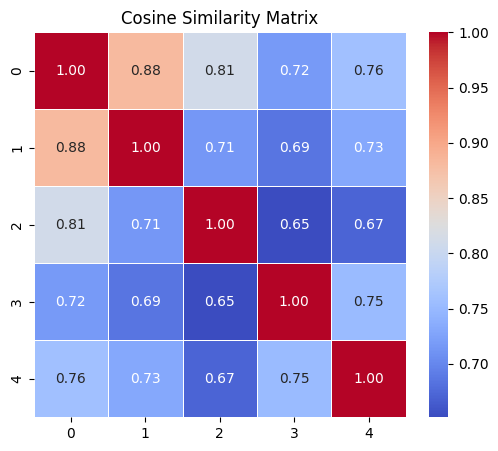

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(similarity_matrix)

plt.figure(figsize=(6, 5))
sns.heatmap(similarity_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Cosine Similarity Matrix")
plt.show()


Παρατηρούμε πως η προτάσεις 0 και 1 έχουν την μεγαλύτερη ομοιότητα μεταξύ τους,καθώς αναφέρουν το αμάξι και κάποιο ζώο και μετά ακολουθούν οι 0 και 2.Η Διαγώνιος προκύπτει απο τον υπολογισμό της ομοιότητας μιας πρότασης με τον εαυτό της.

#  Χρήσιμα Links


[create_chat_completion](https://llama-cpp-python.readthedocs.io/en/latest/api-reference/#llama_cpp.Llama.create_completion)

[create_embedding](https://llama-cpp-python.readthedocs.io/en/latest/api-reference/?utm_source=chatgpt.com#llama_cpp.Llama.create_embedding)